In [2]:
from qiskit import QuantumCircuit 
from qiskit_aer import Aer #Aer is used to simulate noise

# Demonstrating Superposition
The following cells applies a Hadamard gate to a single qubit, creating a superposition state (|0⟩ + |1⟩)/√2 (i.e |+>, and measures it.

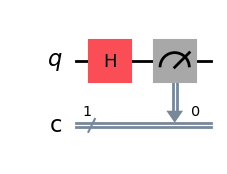

In [12]:
#Create a Circuit with one qubit and one classical bit
qc1 = QuantumCircuit(1,1)
#Now Apply the Hadamard Gate on the qubit
qc1.h(0)
#Meausure the qubit 
qc1.measure(0,0)
"""print circuit, note that "mpl" refers to matplotlib,which needs to downloaded. print(qc1.draw()) also gives you a diagram though not very visually appealing, """
qc1.draw("mpl")


The cell below runs the circuit on a simulator created locally. The results should be around 50% for each of the cells,which will vary slightly when the cells above and below are repeatedly run

In [13]:
#run on simulator
backend=Aer.get_backend('qasm_simulator')
job=backend.run(qc1,shots=1000)
result=job.result()
counts =result.get_counts()
print("Superposition counts:", counts)

Superposition counts: {'0': 502, '1': 498}


## Results of the Superposition Cell

The results show counts of approximately 50% '0' and 50% '1' (e.g., {'0': 512, '1': 488}), with slight variations upon rerunning the cell. This confirms the qubit was in superposition after the Hadamard gate. Here's why:

- **Initial State**: The qubit starts in |0⟩, represented as the vector [1, 0], meaning it's fully in the |0⟩ state.
- **Hadamard Gate**: Applying the Hadamard gate transforms the qubit to (|0⟩ + |1⟩)/√2, a superposition state where it is equally in both |0⟩ and |1⟩ states. In vector form, this is [1/√2, 1/√2].
- **Superposition**: This state means the qubit isn't definitely |0⟩ or |1⟩ but a combination of both, a key quantum concept.
- **Measurement**: When measured, the qubit collapses to either |0⟩ or |1⟩. The probability of each outcome is (1/√2)^2 = 0.5, or 50%, which is why we see ~50% '0' and 50% '1'.
- **Simulator Results**: The Aer QASM simulator ran the circuit 1000 times (shots=1000), sampling the outcomes. The counts reflect the 50/50 probability, with slight variations (e.g., 512/488, then 495/505) due to the probabilistic nature of quantum measurements and the finite number of shots.
  Let's have a look on entanglement

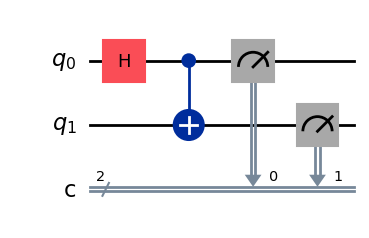

In [4]:
#Creating a Circuit with two qubits and two classical bits
qc2 = QuantumCircuit(2,2)
#Apply Hadamard to qubit 0: creates superposition |0⟩ → (|0⟩ + |1⟩)/√2, so |00⟩ → (|0⟩ + |1⟩)/√2|0⟩
qc2.h(0)
# Apply CNOT (control: qubit 0, target: qubit 1): entangles qubits, (|0⟩ + |1⟩)/√2|0⟩ → (|00⟩ + |11⟩)/√2 = |Φ⁺⟩
qc2.cx(0,1)
#Measuring Qubit 0 and Qubit 1  to classical 0 and 1 respectively
qc2.measure([0,1],[0,1])
qc2.draw("mpl")

In [12]:
#run on simulator
backend = Aer.get_backend('qasm_simulator')
job = backend.run(qc2, shots=1000)
result = job.result()
counts = result.get_counts()
print("Bell state counts:", counts)

Bell state counts: {'00': 506, '11': 494}


## Results of the Bell State Cell

The results show ~50% '00' and 50% '11' (e.g., {'00': 506, '11': 494}), with slight variations upon rerunning. This confirms the qubits are entangled in the |Φ⁺⟩ Bell state:

- **Bell State Creation**: The Hadamard gate creates superposition on qubit 0, (|0⟩ + |1⟩)/√2|0⟩, then the CNOT gate entangles the qubits, producing |Φ⁺⟩ = (|00⟩ + |11⟩)/√2.
- **Entanglement**: Measuring one qubit determines the other: if qubit 0 is '0', qubit 1 is '0'; if '1', then '1'.
- **Probabilities**: The probability of '00' or '11' is (1/√2)^2 = 0.5 (50%), which matches the results.
- **Variations**: The counts vary slightly (e.g., 512/488, then 497/503) due to the probabilistic nature of quantum measurements.
